# SI

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from matplotlib import style
import warnings

from PIL import Image, ImageFont, ImageDraw 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import cv2

### Global Settings

In [87]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
style.use("ggplot")
pathImage = "./data/" # data contiene todas las fotos. Esta en la misma carpeta de este proyecto
SEED = 42
TEST_SIZE = 0.2

## Entendimiento

In [6]:
df = pd.read_csv("./dataset.csv") #dataset esta en la misma carpeta que este jupiter
df

,patientid,filename,label,dataset
0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,cohen
1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,cohen
2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,cohen
3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,cohen
4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,cohen
...,...,...,...,...
15270,2c917d3a-95cb-4c11-802c-f83e28cb37bc,2c917d3a-95cb-4c11-802c-f83e28cb37bc.png,pneumonia,rsna
15271,3040d9d7-d895-453f-887c-616c10531960,3040d9d7-d895-453f-887c-616c10531960.png,pneumonia,rsna
15272,c07f52df-d481-434f-84c1-04263926ac40,c07f52df-d481-434f-84c1-04263926ac40.png,pneumonia,rsna
15273,c109061a-d815-4cae-8343-9230d8024adf,c109061a-d815-4cae-8343-9230d8024adf.png,pneumonia,rsna


<AxesSubplot:xlabel='label', ylabel='count'>

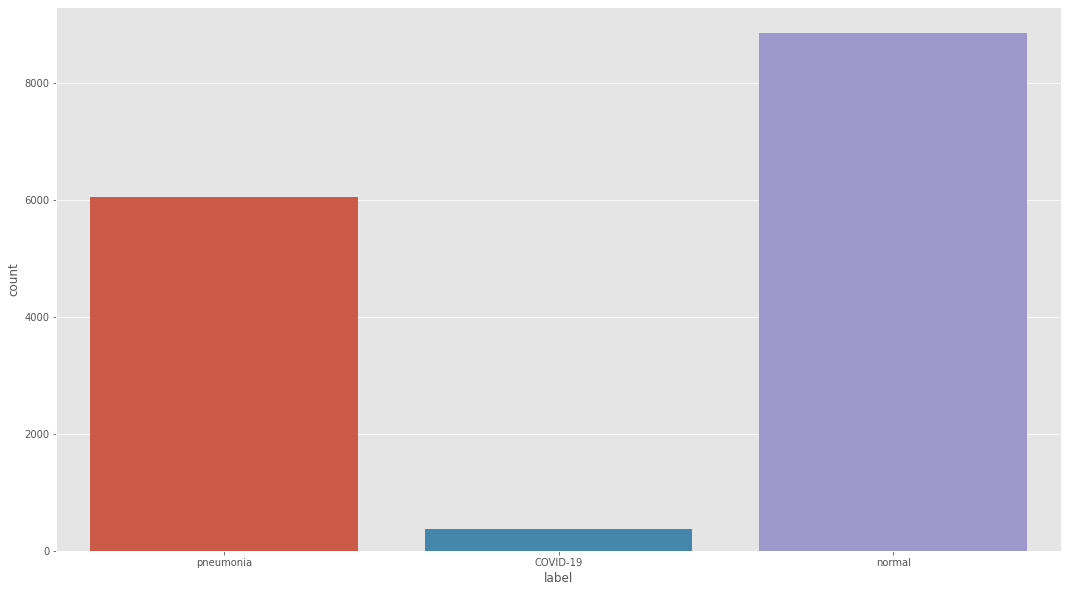

In [15]:
plt.figure(figsize=(18,10))
sns.countplot(df.label)

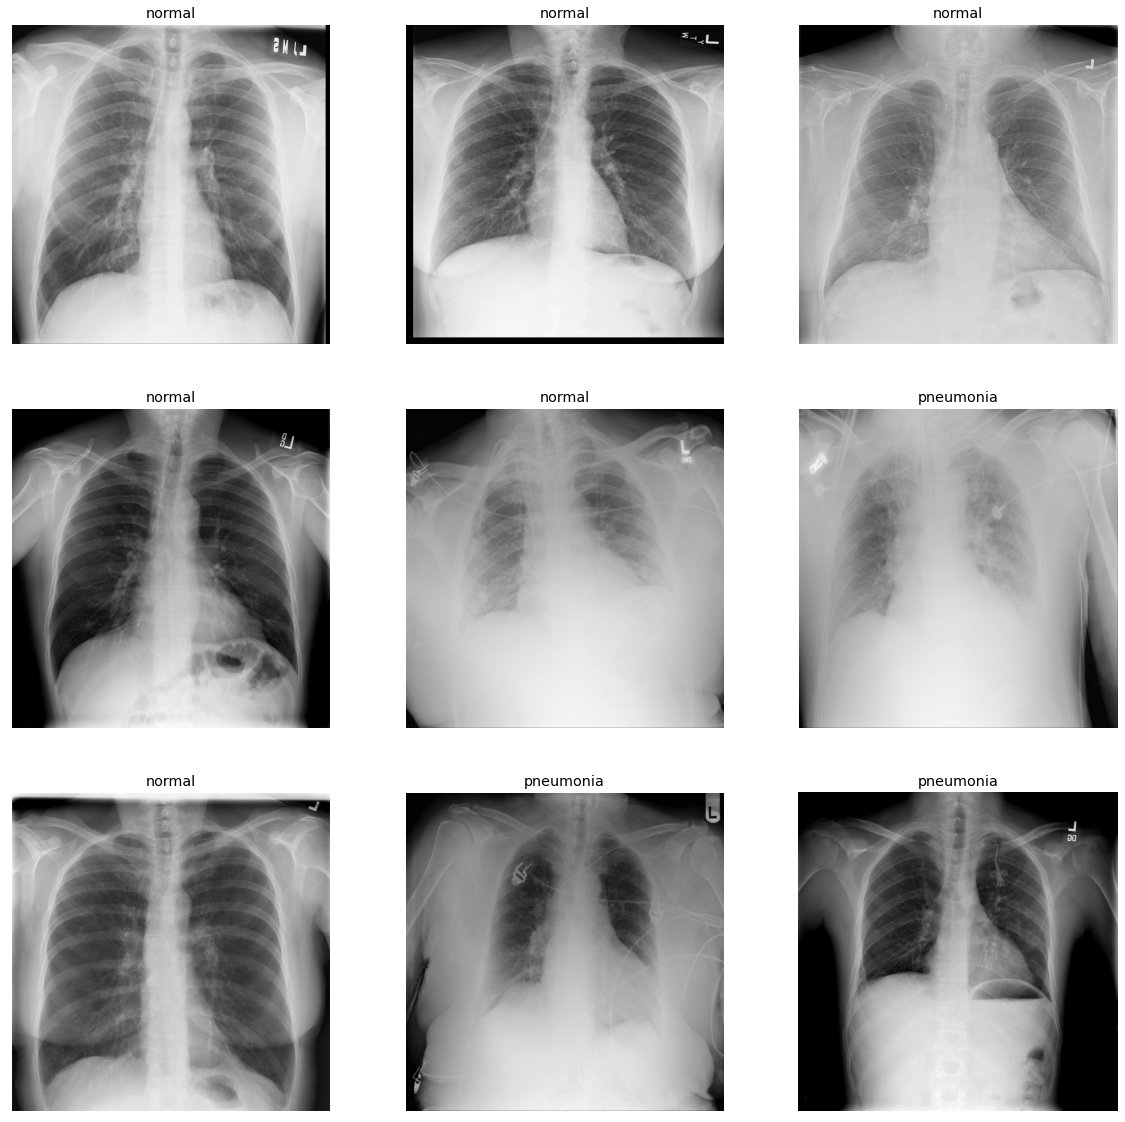

In [63]:
sample = df.sample(9)
fig, axs = plt.subplots(3,3,figsize=(20,20))
plt.axis('off')
i = 0
for ax in axs.flat:
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    label = sample.label.values[i]
    path = pathImage + sample.filename.values[i]
    
    img = cv2.imread(path, 0) 
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    i+=1

### Preprocesamiento de datos

In [79]:
# lOADING ALL DATA AND RESIZING

Data = []
Target = []
resize = 224

for index, row in tqdm(df.iterrows()):
    label = row['label']
    path = pathImage + row['filename']
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(label)
    
print(len(Data))

3001


In [86]:
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

['COVID-19' 'normal' 'pneumonia']
[0. 0. 1.]


In [88]:
(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=TEST_SIZE, stratify=labels, random_state=SEED)

### Desarrollando el modelo

In [94]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [65]:
# https://keras.io/api/applications/inceptionresnetv2/
engine = keras.applications.InceptionResNetV2(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3),
    classifier_activation = 'sigmoid')

219062272/219055592 [==============================] - 57s 0us/step
